# Loan Approval Prediction Description
The Goal:

To discover insights about how the loan has been approved.
The Proposal:

Use data cleaning, EDA, data visualization and statistics techniques to analyze the loan approval insights, and build a machine learning model that practices my machine learning skills.

### Step 1: Setup and Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
loan_df = pd.read_csv('loan_approval_dataset.csv')

In [4]:
loan_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected



About columns (Information provided by the owner)¶

    loan_id
    no_of_dependents: Number of Dependents of the Applicant
    education: Education of the Applicant (Graduate/Not Graduate)
    self_employed: Employment Status of the Applicant
    income_annum: Annual Income of the Applicant
    loan_amount: Loan Amount
    loan_term: Loan Term in Years
    cibil_score: Credit Score
    residential_assets_value
    commercial_assets_value
    luxury_assets_value
    bank_asset_value
    loan_status: Loan Approval Status (Approved/Rejected)



In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
loan_df.describe(include='all')

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269,4269,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved
freq,NaN,NaN,2144,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656
mean,2135.000000,2.498712,NaN,NaN,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,NaN,NaN,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,NaN,NaN,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,NaN,NaN,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,NaN,NaN,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,NaN,NaN,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN


In [7]:
loan_df[loan_df['loan_id'].duplicated(keep = False) == True].sort_values(['loan_id'])   

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


In [8]:
loan_df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')



By the data cleaning scans, we have confirmed:

    1.There is no null value and duplicated value in this dataset.
    2.no_of_dependents, education, self_employed and loan_status are categorical columns.
    3.There are a total 4269 rows in this dataset, with 13 columns (features).
    4.There are 2656 data with an approved loan_status, which is about 62.2% compared to the "rejected" group. The dataset is slightly imbalanced but it is acceptable and we don't need to rebalance it.
    5.Other columns are numerical.  
    6.all the column names contain a space in front of the text, we need to trim them up to avoid future confusions.



In [9]:
loan_df.columns = loan_df.columns.str.replace(' ', '')

In [21]:
loan_df.drop(columns = ['loan_id'], inplace = True)

## EDA

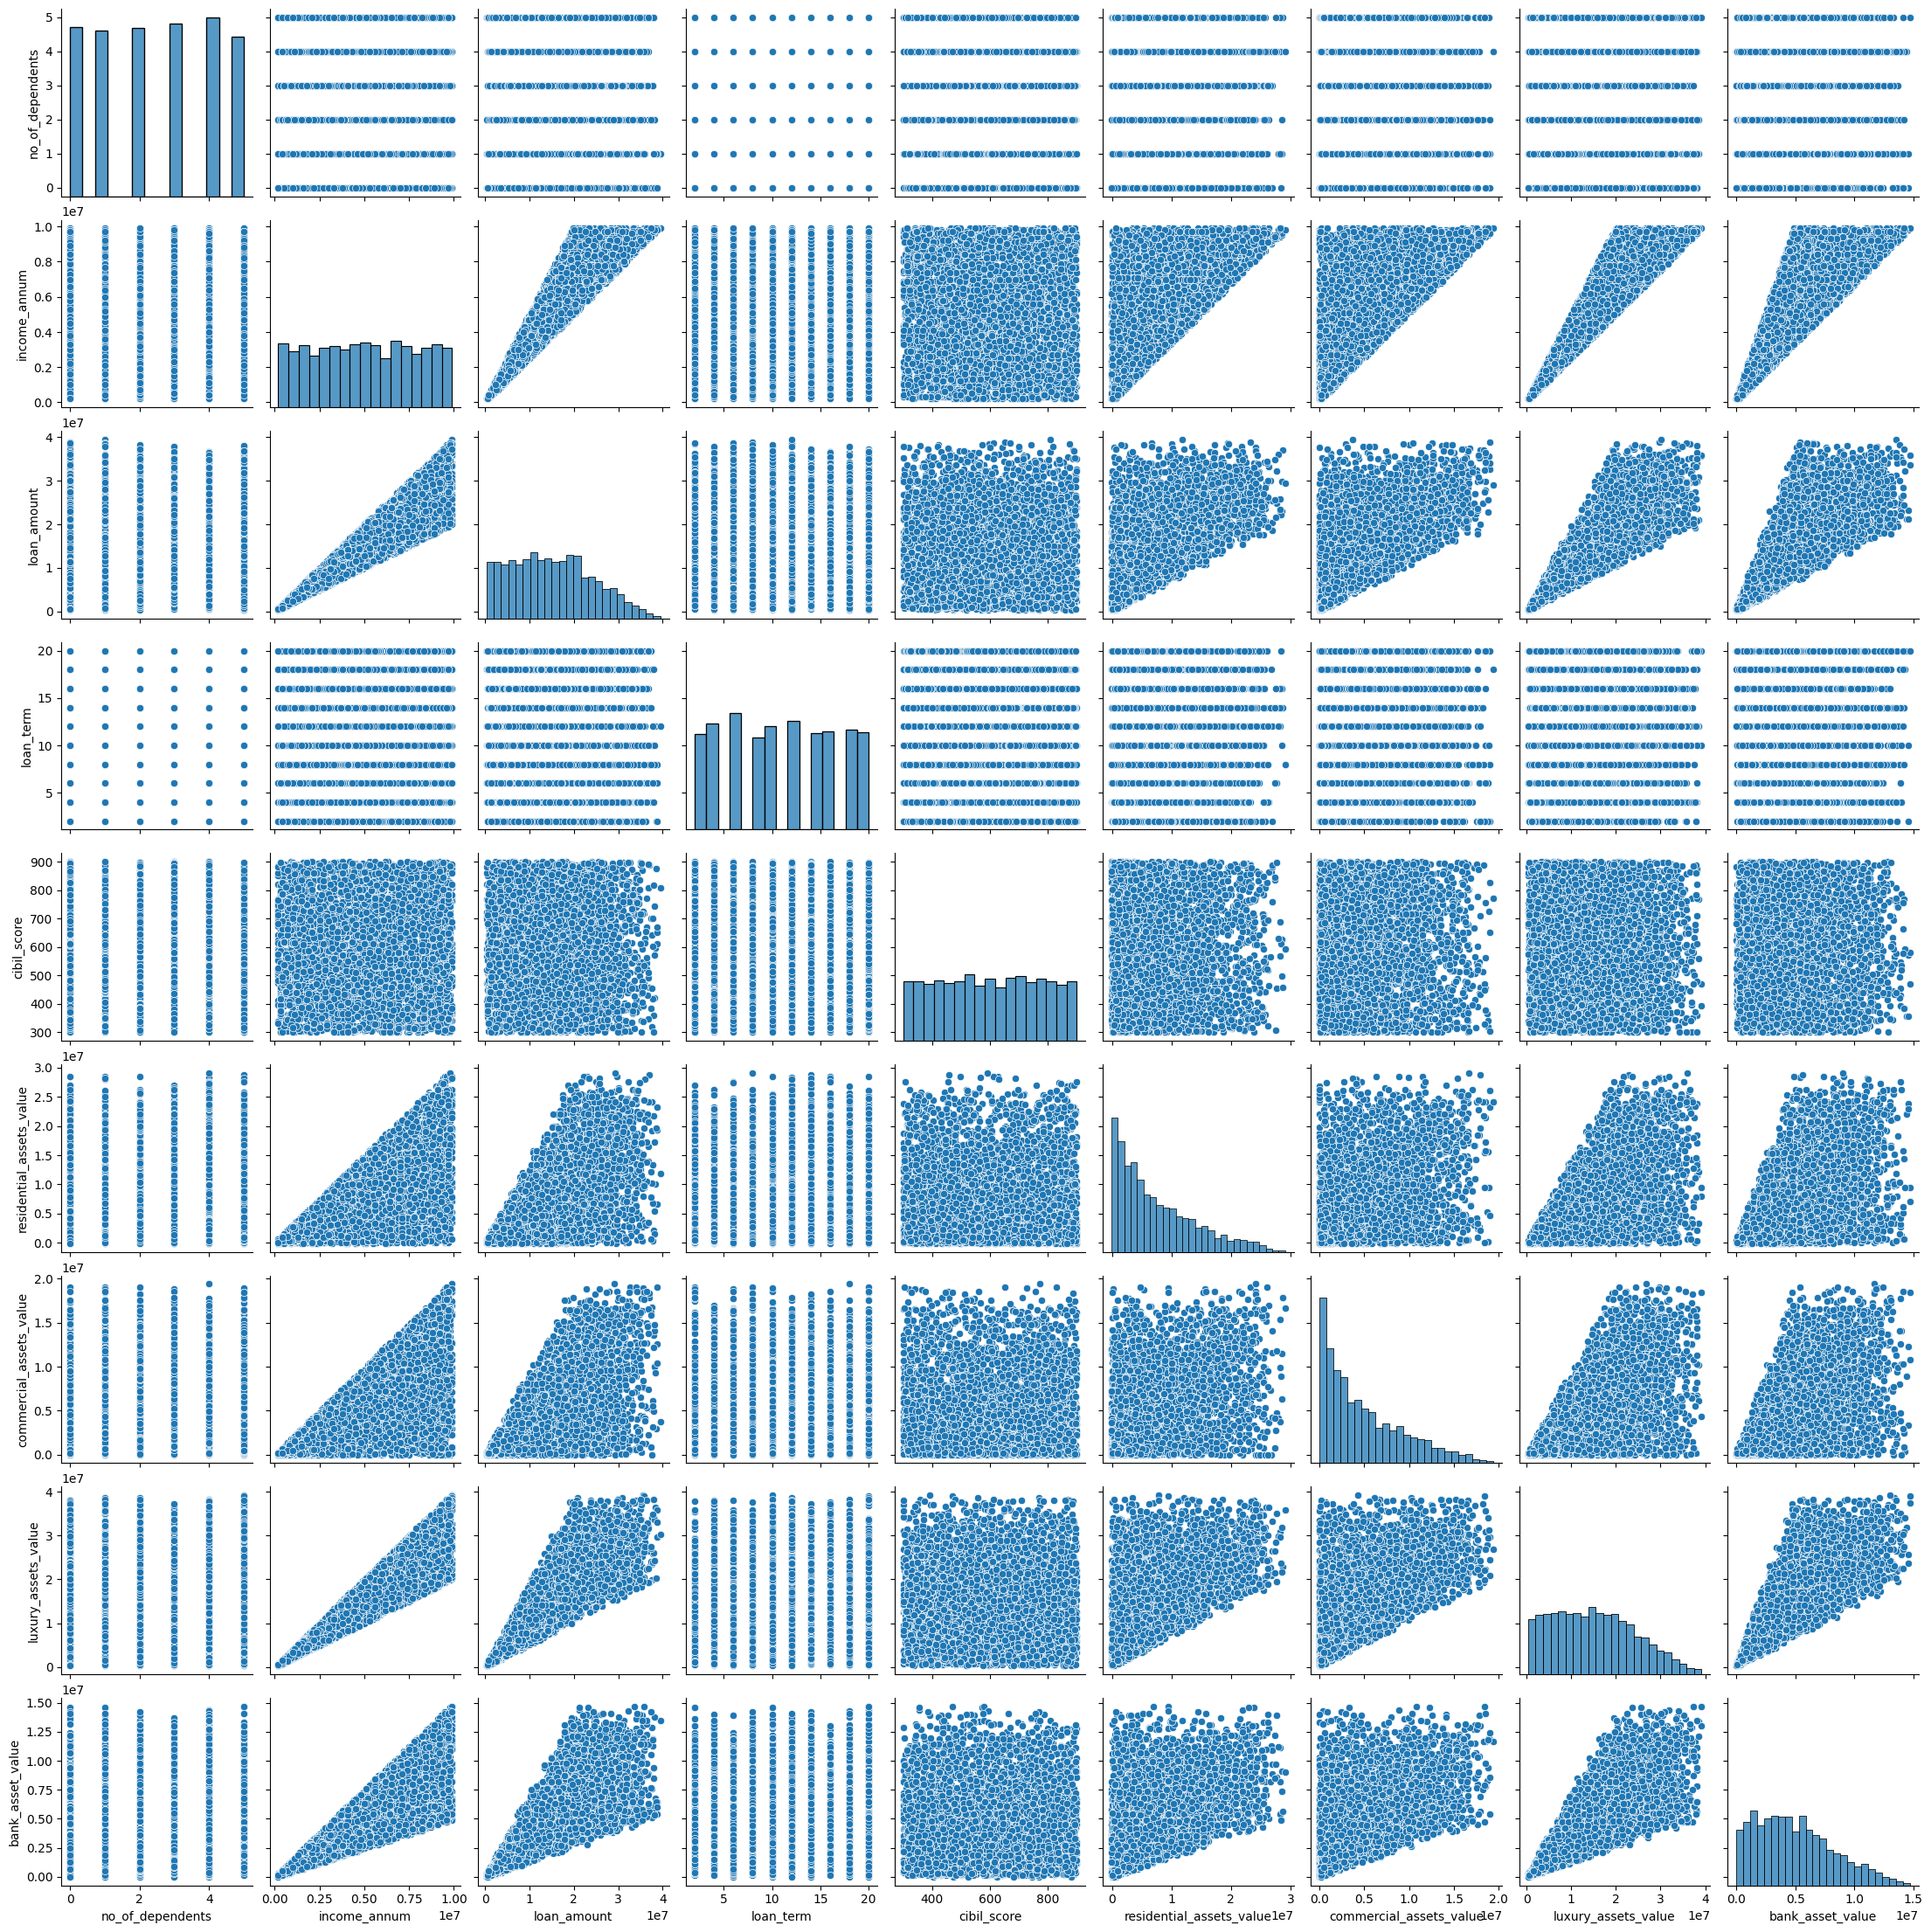

In [12]:
sns.pairplot(loan)



As we can see, there are some variables having positive correlation with other variables, for example loan_amount & income_annum, luxury_assets_value & bank_asset_value, income_annum & luxury_assets_value. Let's start from here.
1. Loan status and loan amount

Let's firstly take a look at the distribution of loan amounts.


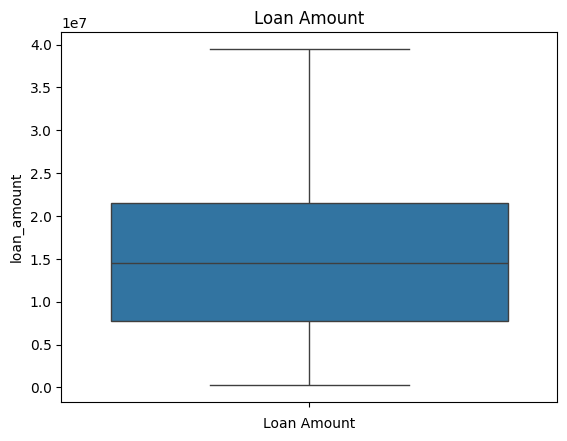

In [13]:
sns.boxplot(loan['loan_amount'])
plt.title("Loan Amount")
plt.xlabel("Loan Amount")
plt.show()

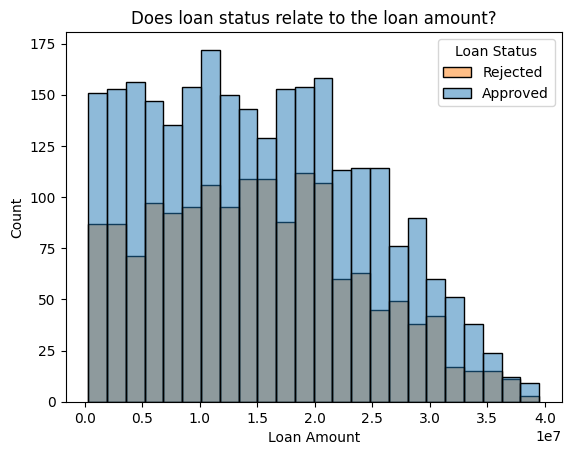

In [14]:
sns.histplot(loan, x='loan_amount', hue='loan_status')
plt.title("Does loan status relate to the loan amount?")
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.legend(title='Loan Status', loc='upper right', labels=['Rejected', 'Approved'])
plt.show()

We can  mark that both approved and rejected loans have the same trends based on the different loan amounts, we haven't seen a strong relationship between the loan status and the loan amount in the histogram, but how about other features? For example, annual income.

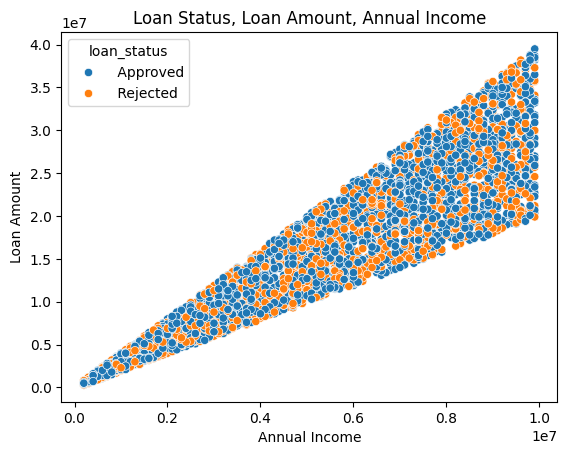

In [15]:
sns.scatterplot(x=loan['income_annum'], y= loan['loan_amount'], hue=loan['loan_status'])
plt.title("Loan Status, Loan Amount, Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.show()

There are some interesting insights we have seen over the above figure:

###### 1.When annual income increases, the loan amount tends to increase. But the annual income doesn't show an obvious trend with the loan status.

###### 2.In this dataset, the applicants who have the lower annual income have a narrow range in loan amounts. Vise Versa, the applicants who have the higher lower annual income have a wider range in the loan amounts. Besides that the lenders will only accept the loan amount that aligns with the annual income in order to insure the applicants have ability to pay the loan back, it is easy to imagine the applicants who have higher annual income have more flexibility on the amount of the loan, whatever for themselves or for the lenders.

###### 3.In this dataset, the applicants who has highest annual income has been approved when they apply for the highest loan amount (see the upper right corner of the figure), but at the same time, the applicants who have the highest annual income have chances of being rejected when they apply lower loan amount (see the middle right of the figure/lower right of the triangle). It can be caused by different lenders and other conditions of the applicants. Let's use some code to take a closer look at it.

In [16]:
loan.loc[(loan['income_annum'] == loan['income_annum'].max()) & (loan['loan_status'] ==' Rejected')]

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
82,2,Not Graduate,Yes,9900000,21200000,16,363,25500000,11400000,26600000,6800000,Rejected
157,5,Not Graduate,Yes,9900000,33300000,6,364,5300000,18700000,27800000,8300000,Rejected
1179,5,Graduate,No,9900000,35700000,10,392,7900000,4300000,39200000,13000000,Rejected
1272,5,Not Graduate,No,9900000,35800000,20,470,9500000,18400000,39100000,14700000,Rejected
1409,3,Graduate,Yes,9900000,29900000,20,490,10500000,9100000,27100000,7400000,Rejected
1547,1,Graduate,Yes,9900000,34100000,14,371,24400000,7100000,29300000,6200000,Rejected
1890,5,Graduate,No,9900000,24600000,2,530,24200000,12800000,20400000,13000000,Rejected
2862,4,Graduate,No,9900000,30000000,18,496,10400000,8000000,29300000,13800000,Rejected
2869,4,Graduate,No,9900000,26100000,2,481,14500000,5000000,23600000,9300000,Rejected
3000,1,Not Graduate,Yes,9900000,25700000,2,340,15600000,18800000,29500000,11800000,Rejected


In the previous section, we have noticed that applicants who have the highest annual income tried to apply for a lower loan amount, but were rejected by the lenders. By checking up the subset (showing above), we confirm that the loan amount is not the main reason that causes their applications to be rejected. Taking a closer look at this subset, I see their credit scores (`cibil_score`) are considered as "Poor".
<br>
According to Equifax, the standard of the credit scores are: 300-579: Poor. 580-669: Fair. 670-739: Good. 740-799: Very good.

Resource: https://www.equifax.com/personal/education/credit/score/what-is-a-credit-score/#:~:text=300%2D579%3A%20Poor,740%2D799%3A%20Very%20good


Let's take a look at the credit score!

#### 2. Credit Score

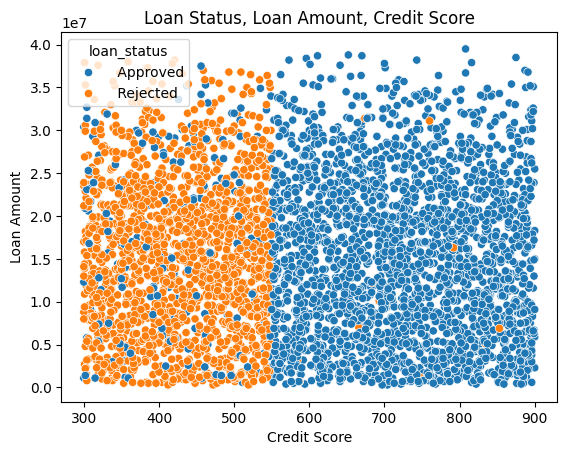

In [17]:
sns.scatterplot(x=loan['cibil_score'], y= loan['loan_amount'], hue=loan['loan_status'])
plt.title("Loan Status, Loan Amount, Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Loan Amount")
plt.show()

Now we can notice that  the credit scores around 540 - 550 separate the loan status into two parts in a very clear way. In the other words, the loan status is highly related to the credit score.
<br>
It is also interesting to see the credit score that separates the loan status is not 579 which is the highest score of the "poor" credit score. In the other words, the poor credit scores which are above 540 - 550 still have a good chance of being approved by loan lenders. This could be attributed to lenders' flexibility or specific factors that impact approval decisions.

However, we also notice a puzzling trend: some of the applicants with high credit scores (above 740) were still rejected. Few of them have only applied for a small amount of the loan which is below the median amount. What is the reason?

In [22]:
loan.loc[(loan['cibil_score'] > 740) & (loan['loan_status'] ==' Rejected')].sort_values(['cibil_score'], ascending= False)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
559,2,Graduate,Yes,200000,500000,6,885,-100000,0,300000,200000,Rejected
3527,0,Graduate,No,1800000,6900000,10,853,900000,400000,3700000,1700000,Rejected
911,0,Graduate,Yes,1300000,4800000,4,835,500000,100000,3300000,800000,Rejected
3213,1,Not Graduate,Yes,4300000,16300000,14,792,400000,400000,10200000,4000000,Rejected
236,3,Graduate,Yes,900000,3500000,4,770,700000,0,2000000,600000,Rejected
4099,3,Graduate,No,8700000,31100000,16,760,400000,1800000,19300000,4800000,Rejected
1446,1,Graduate,No,300000,1200000,18,747,100000,0,700000,200000,Rejected


By creating the subset, we have more than 5 applicants with more than 740 credit scores, their applications were rejected.
<br>
In order to discover more reasons, there are 4 features that take my attention, they are `residential_assets_value`, `commercial_assets_value`, `luxury_assets_value`, `bank_asset_value`. Since we are not able to find the description of these 4 variables from the dataset, let's do some research and see what they are.

In [23]:
loan_df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


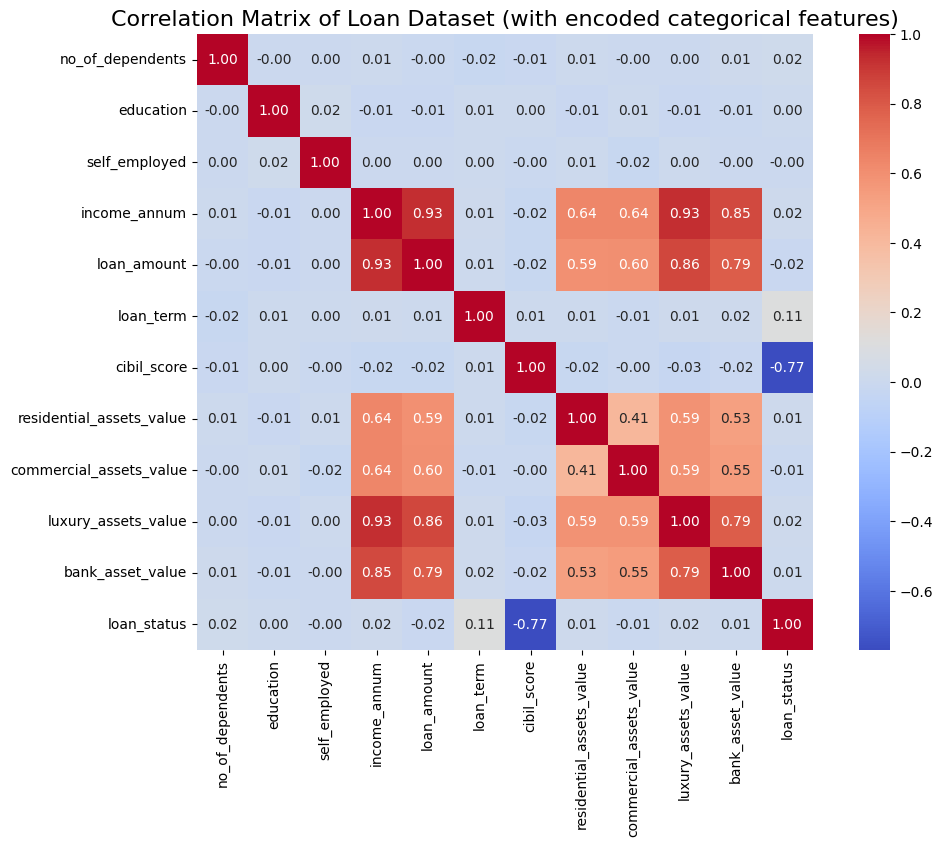

In [27]:
from sklearn.preprocessing import LabelEncoder
# Copy dataset to avoid modifying original
df_encoded = loan_df.copy()

# Encode categorical columns
label_enc = LabelEncoder()
for col in ["education", "self_employed"]:
    df_encoded[col] = label_enc.fit_transform(df_encoded[col])

# Also encode target if it's categorical
if df_encoded["loan_status"].dtype == 'object':
    df_encoded["loan_status"] = label_enc.fit_transform(df_encoded["loan_status"])

# Compute correlation matrix
corr = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix of Loan Dataset (with encoded categorical features)", fontsize=16)
plt.show()

# Correlation Insights from Loan Dataset

## Key Observations

### 1. CIBIL Score vs Loan Status
- The strongest relationship is between **cibil_score** and **loan_status**, with a correlation of approximately **-0.77**.  
- Since the correlation is negative, this indicates that **lower CIBIL scores are strongly associated with loan rejections**, while higher CIBIL scores are linked to approvals.  
- This aligns with real-world lending practices, where credit scores are a primary factor in approval decisions.

### 2. Income, Loan Amount, and Assets
- **income_annum, loan_amount, luxury_assets_value, and bank_asset_value** are highly correlated with each other (ranging from **0.79 to 0.93**).  
- Applicants with higher income generally request larger loans and possess higher-value assets.  
- Despite this, their direct correlation with **loan_status** is very weak, suggesting that these features are more indicative of financial capacity rather than decisive approval criteria.

### 3. Loan Term
- **loan_term** shows a weak positive correlation (**0.11**) with **loan_status**.  
- This suggests that applicants opting for longer repayment periods are slightly more likely to get approved, although the effect is small compared to credit score.

### 4. Dependents, Education, and Employment Status
- **no_of_dependents, education, and self_employed** all show correlations close to zero with **loan_status**.  
- This indicates that these demographic variables have little direct influence on approval outcomes.  
- They may still provide value when combined with other features, but their standalone predictive power is limited.

### 5. Commercial and Residential Assets
- **residential_assets_value** and **commercial_assets_value** are moderately correlated with income and loan amount (around **0.59–0.64**).  
- However, their correlation with **loan_status** is near zero, meaning that while they represent wealth, they are not strong indicators of approval decisions compared to credit score.

---

## Insights for Modeling

- **Most predictive variable:** `cibil_score` is the most critical feature for predicting loan approval.  
- **Supporting features:** `loan_term` provides a minor positive influence, while income and assets may indirectly contribute to financial profiling but do not strongly predict approval.  
- **Low-value features:** Demographic attributes (`no_of_dependents`, `education`, `self_employed`) add little predictive value individually.  
- **Multicollinearity risk:** Strong correlations among `income_annum`, `loan_amount`, and asset-related features may cause redundancy in linear models. Tree-based models can handle this more effectively.

---

## Recommendation

- Focus primarily on **cibil_score** when building predictive models.  
- Use **income, loan_amount, and assets** carefully, possibly applying dimensionality reduction (e.g., PCA) or regularization to mitigate multicollinearity.  
- Consider excluding weak predictors unless experiments show that they improve recall or F1-score.  


---
# Feature Engineering
 1. Copy dataset
 2. Encode categorical variables
 3. Feature-target split
 4. Train-test split
 5. Scale numerical features
 6. Handle imbalanced data using SMOTE

In [28]:
df = loan_df.copy()

In [29]:
label_enc = LabelEncoder()
for col in ["education", "self_employed"]:
    df[col] = label_enc.fit_transform(df[col])

# Encode target if needed
if df["loan_status"].dtype == 'object':
    df["loan_status"] = label_enc.fit_transform(df["loan_status"])


In [30]:
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler
num_cols = [
    "no_of_dependents",
    "income_annum",
    "loan_amount",
    "loan_term",
    "cibil_score",
    "residential_assets_value",
    "commercial_assets_value",
    "luxury_assets_value",
    "bank_asset_value"
]

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [38]:
%pip install imbalanced-learn

                                              0.0/240.0 kB ? eta -:--:--
     ----                                    30.7/240.0 kB 1.3 MB/s eta 0:00:01
     ----------------                       102.4/240.0 kB 1.2 MB/s eta 0:00:01
     -----------------------------------    225.3/240.0 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 240.0/240.0 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: C:\Users\George\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [39]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Original training set shape:", X_train.shape, y_train.value_counts().to_dict())
print("Resampled training set shape:", X_train_res.shape, pd.Series(y_train_res).value_counts().to_dict())

Original training set shape: (3415, 11) {0: 2125, 1: 1290}
Resampled training set shape: (4250, 11) {1: 2125, 0: 2125}


---
# Model Training
---

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score  
# Logistic Regression
log_reg = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
log_reg.fit(X_train_res, y_train_res)
y_pred_log = log_reg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(class_weight="balanced", random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb.fit(X_train_res, y_train_res)
y_pred_xgb = xgb.predict(X_test)

C:\Users\George\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [10:13:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


---
# Evaluation
---


In [49]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n=== {name} ===")
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))

evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       531
           1       0.91      0.91      0.91       323

    accuracy                           0.93       854
   macro avg       0.93      0.93      0.93       854
weighted avg       0.93      0.93      0.93       854

[[501  30]
 [ 28 295]]

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       531
           1       0.98      0.97      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

[[524   7]
 [ 11 312]]

=== XGBoost ===
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       531
           1       0.99      0.97      0.98       323

    accuracy                           0.98       854
   macro avg 

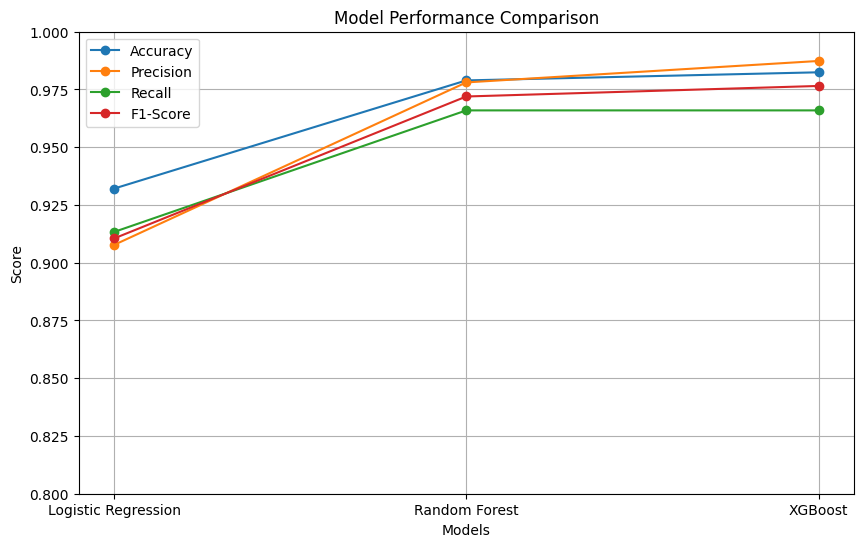

In [51]:
models = {
    "Logistic Regression": y_pred_log,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb
}

metrics = {"Accuracy": [], "Precision": [], "Recall": [], "F1-Score": []}

for name, y_pred in models.items():
    metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["Precision"].append(precision_score(y_test, y_pred))
    metrics["Recall"].append(recall_score(y_test, y_pred))
    metrics["F1-Score"].append(f1_score(y_test, y_pred))

# Plot
plt.figure(figsize=(10,6))
x = range(len(models))

for i, metric in enumerate(metrics.keys()):
    plt.plot(x, metrics[metric], marker='o', label=metric)

plt.xticks(x, list(models.keys()))
plt.ylim(0.8, 1.0)  # focus on high performance range
plt.title("Model Performance Comparison")
plt.xlabel("Models")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

---
# Hyperparameter Tuning for XGBoost
---

In [54]:
from sklearn.model_selection import  GridSearchCV
param_grid_xgb = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(
    estimator=XGBClassifier(
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42
    ),
    param_grid=param_grid_xgb,
    scoring="f1",   # focus on F1-score for imbalanced data
    cv=3,           # reduce to 3 for speed (can use 5 if dataset is small)
    n_jobs=-1,
    verbose=1
)

grid_search_xgb.fit(X_train_res, y_train_res)

print("\n=== Best XGBoost Parameters ===")
print(grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

print("\n=== Tuned XGBoost Performance ===")
print(classification_report(y_test, y_pred_best_xgb))
print(confusion_matrix(y_test, y_pred_best_xgb))

Fitting 3 folds for each of 108 candidates, totalling 324 fits


C:\Users\George\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [10:15:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Best XGBoost Parameters ===
{'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}

=== Tuned XGBoost Performance ===
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       531
           1       0.98      0.97      0.98       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

[[525   6]
 [ 10 313]]


In [55]:
# Best parameters
print("\n=== Best XGBoost Parameters ===")
print(grid_search_xgb.best_params_)

# Best F1 score during cross-validation
print("Best CV F1-score:", grid_search_xgb.best_score_)

# Best model
best_xgb = grid_search_xgb.best_estimator_

# Predictions on test set
y_pred_best_xgb = best_xgb.predict(X_test)

# Accuracy on test set
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred_best_xgb)

print("\n=== Tuned XGBoost Performance ===")
print("Test Accuracy:", test_accuracy)
print(classification_report(y_test, y_pred_best_xgb))
print(confusion_matrix(y_test, y_pred_best_xgb))



=== Best XGBoost Parameters ===
{'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
Best CV F1-score: 0.9837476654939604

=== Tuned XGBoost Performance ===
Test Accuracy: 0.9812646370023419
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       531
           1       0.98      0.97      0.98       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

[[525   6]
 [ 10 313]]
